### Computational Guided Inquiry for Modeling Earth's Climate (Neshyba, 2023)

# Scheduled Flows

## Overview
The idea of this module is to create an emissions scenario -- a _schedule_ -- that describes how much carbon humans have released to the atmosphere in the past, and that makes projections about future emissions. 

## Mathematical form of anthropogenic emissions
The emissions scenario generated here has the form 

$$
\epsilon(t) = {e^{kt} \ \sigma_{down}(t)}   \ \ \ \ (1)
$$

where $\epsilon$ is understood to be a rate of emission of carbon into the atmosphere, on a per-year basis, as a function of time, $t$. You can see that there are two parts: an exponential term, $e^{kt}$, and a sigmamoidal term, $\sigma_{down}(t)$. Let's have a look at two parts one by one.

## Exponential growth
The exponential term, which we'll also write as $exp(kt)$, describes a kind of growth characterized by a doubling time: after every so many years, $e^{kt}$ becomes twice as large as it was before. This doubling time is governed by the constant $k$, which is called a *rate constant*. A large value of $k$ implies faster growth, and therefore less time between doubling events. Part of your job will be to find a reasonable value for $k$, but a good guess is to say that in the last few hundred years, carbon emissions (like human population) doubled about every 30 years, which implies a growth rate of roughly $2.5\%$ per year. That, in turn, implies $k=0.025 \ yr^{-1}$. 

## Sigmoid functions
The next term in Eq. 1 is called a *sigmoid* function. What's that?

In general, sigmoid functions step up or down over some independent variable (like time). You can read about them at https://en.wikipedia.org/wiki/Sigmoid_function. In this CGI, we'll be creating two of them, $\sigma_{up}(t)$ and $\sigma_{down}(t)$. Some details on this are as follows:

$\sigma_{up}(t)$ starts at zero, and runs up to one. Mathematically, we'll say 

$$
\sigma_{up}(t) = {1 \over 1 + e^{  -3(t-t_{trans})/ \Delta t_{trans}   }} \ \ \ \ (2)
$$

This function is centered around $t_{trans}$, the "transition year." Another parameter, called $\Delta t_{trans}$, specifies how long it will take for the transition to get from $0.2$ to $0.8$ (the "20/80" rule). 

$\sigma_{up}(t)$ starts at one, and runs up to zero. It takes the same parameters as $\sigma_{up}$, and in fact can be calculated from it with 

$$
\sigma_{down}(t) = 1 - \sigma_{up}(t) \ \ \ \ (3)
$$

As it turns out, it's often more convenient to specify the *year of peak emissions*, and use that value to compute the *transition year*. The relationship is 

$$
t_{trans} = t_{peak} + 
{\Delta t_{trans} \over 3} log \big ( 
{ 3 \over {k \Delta t_{trans}}} -1
\big ) 
\ \ \ \ (4)
$$

## Normalizing (AKA pegging)
Eq. 1 has a certain flaw that we'll need to correct: it doesn't have units GtC/year! To fix that, we need to do something called *normalization*:

$$
\epsilon(t) = N {e^{kt} \ \sigma_{down}(t)}   \ \ \ \ (5)
$$

where 

$$
N = {\epsilon_{o} \over {exp(kt_{o}) \ \sigma_{down}(t_{o})}}   \ \ \ \ \ (6)
$$

where we're focusing on some particular year (here called $t_o$) for which we happen to know the emissions were $\epsilon_{o}$ GtC/year. The $N$ therefore provides us a way to guarantee that our emissions model is correct at that year. Normalization is also therefore sometimes called "pegging."

## Metadata and functions
Part of good coding practice is finding ways to save data in a way that is "self-documenting." Like, including the units of your data, or other parameters. Fortunately, with a combination of Python's _Pandas_ package, and a built-in Python feature called _dictionaries_, we can do all that. So we'll be learning a bit about _Pandas_ and _dictionaries_ too.

Another part of good coding practice is to find ways to re-use code. Here, you'll be doing that using Python _functions_.

## Computing skills

- I can set up functions in python, and am familiar with methodolgies for ensuring they are working.
- I can use pandas and dictionaries to write and read data and associated metadata to a file.

## Climate science skills

- I can describe how exponential growth is represented mathematically.
- I can describe how sigmoid (step) functions are represented mathematically.
- I understand the purpose of normalization, and can paramaterize a normalization factor according to a desired emissions scenario.
- I can read doubling times for exponential growth off a graph, and I can predict that doubling time based on the rate constant ($k$) of the growth.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5io

In [2]:
%matplotlib notebook

### Exponential growth
In the cell below, we calculate and plot an exponential growth curve with a growth rate of $2.9 \%$.

<IPython.core.display.Javascript object>


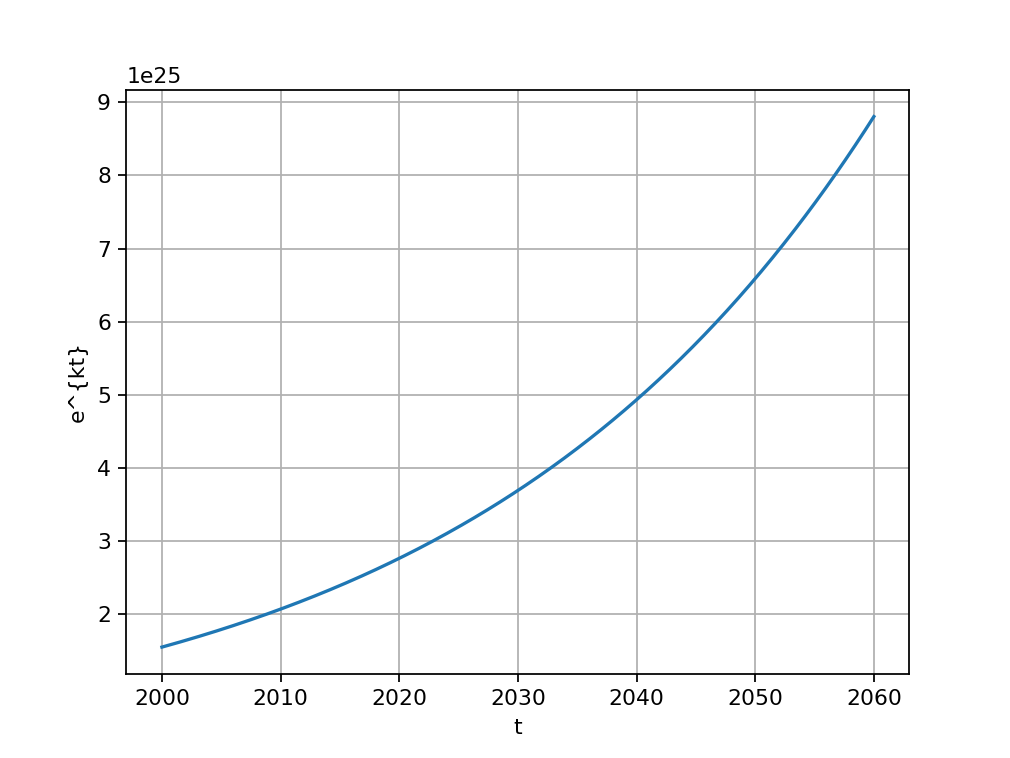

In [3]:
# First lay out an array of times
t_start = 2000
t_stop = 2060
nsteps = 500
t = np.linspace(t_start,t_stop,nsteps)

kexample = 0.029
myexp1 = np.exp(kexample*t)
plt.figure()
plt.plot(t,myexp1)
plt.xlabel('t')
plt.ylabel('e^{kt}')
plt.grid(True)

### Pause for analysis
In this curve, you can see that between the years 2009 and 2033, $e^{kt}$ rose from 2 to 4 -- i.e., it doubled in about 24 years. The idea of exponential growth would say that the *next* doubling would take another 24 years or so. Does that work out? Spell this out in the cell below -- like, in what year did $e^{kt}$ double from 4 to 8? How many years (from 2033) did that take?

### BEGIN SOLUTION
$e^{kt}$ rises from 4 to 8 between the years 2033 and 2057, which is a time interval of 24 years.
### END SOLUTION

### Your turn
In the cell below, construct an exponential growth curve using a growth rate of $2.5 \%$. For consistency with what follows, it'll be convenient to name your growth rate variable $k$, and the resulting exponential array "myexp." Oh, and let's expand the time range: starting in the year 1750, and running until the year 2200. You can specify however many steps in that span of time, but 500 is a good number.

Then plot myexp as a function of time (t) to make sure it looks OK.

<IPython.core.display.Javascript object>


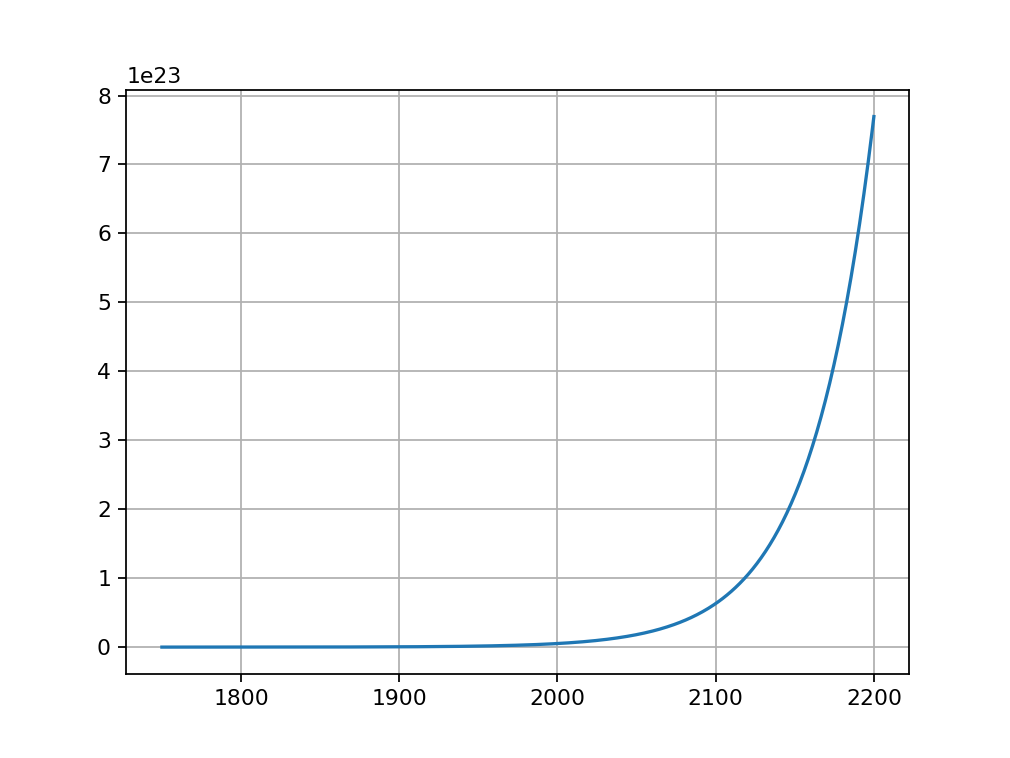

In [4]:
### BEGIN SOLUTION

t_start = 1750
t_stop = 2200
nsteps = 500
t = np.linspace(t_start,t_stop,nsteps)
k = 0.025

myexp = np.exp(k*t)
plt.figure()
plt.plot()
plt.plot(t,myexp)
plt.grid(True)

### END SOLUTION

### Pause for analysis
Since $k$ is *smaller* than before, we expect the doubling time to be larger than 24 years. Inspect this graph to estimate the new doubling time, and write your answer in the cell below. 

There's a handy formula, by the way, for predicting the doubling time: it's $70/k$ (with $k$ in $\%$). Does the value you get from that formula agree with what you got from reading the graph?

### BEGIN SOLUTION
Seems to be about 28 years, which agrees with 70/k.
### END SOLUTION

### Creating the $\sigma_{up}$ function
The cell below creates the *step-up* sigmoid function described in the Introduction, Eq. 2.

In [5]:
def sigmaup(t,t_trans,delta_t_trans):
  # Generates a sigmoid (smooth step-up) function that rises from zero to 1
  return 1 / (1 + np.exp(-(t-t_trans)*3/delta_t_trans))

### Testing $\sigma_{up}$
In the cell below, the idea is to test the function we just created. We're using the same array of times that we specified before (so that doesn't have to be redefined here), but we do need to specify the parameters for the sigmaoid function, $t_{trans}$ and $\Delta t_{trans}$.

2040
20
0.025


<IPython.core.display.Javascript object>


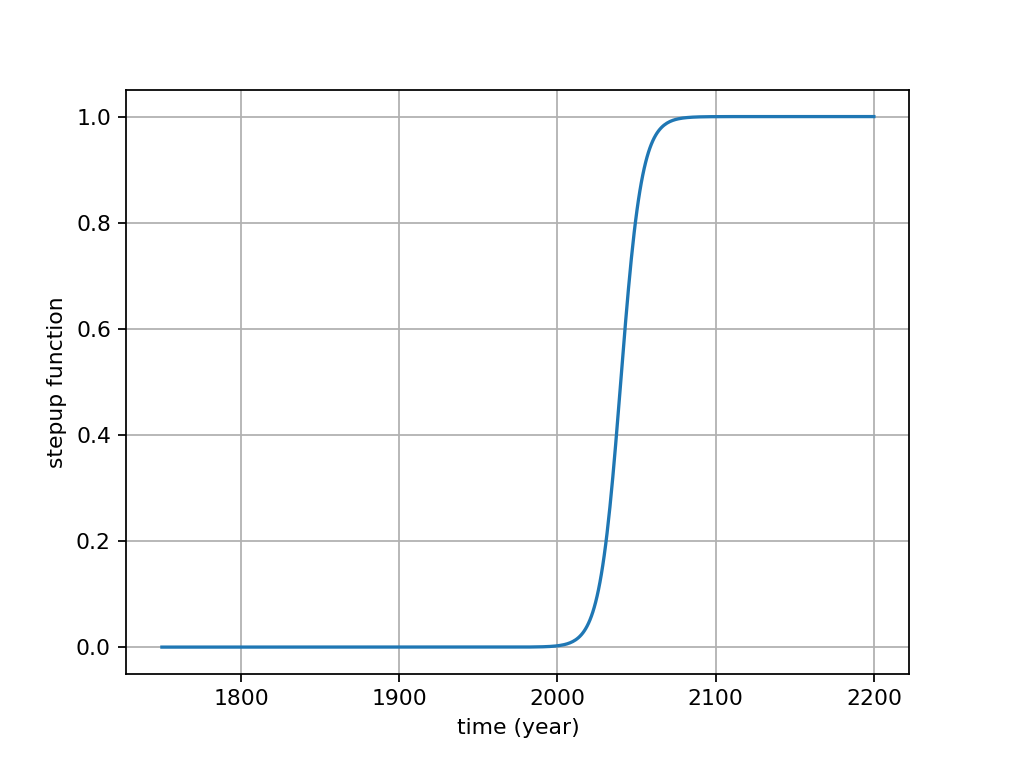

In [6]:
# Parameters
t_trans = 2040; print(t_trans)
delta_t_trans = 20; print(delta_t_trans)
k = 0.025; print(k)

# Calculating sigmaup using the sigmaup function
mysigmaup = sigmaup(t,t_trans,delta_t_trans)

# Graphing the result
plt.figure()
plt.plot(t,mysigmaup)
plt.xlabel('time (year)')
plt.ylabel('stepup function')
plt.grid()

### Your turn
Now write a *step-down* function, as described by Eq. 3 of the Introduction. It should be called "sigmadown", and take the same arguments as sigmaup does.

In [7]:
### BEGIN SOLUTION 
def sigmadown(t,t_trans,delta_t_trans):
  # Generates a sigmoid (smooth step-down) function
  return 1 - sigmaup(t,t_trans,delta_t_trans)
### END SOLUTION

### Testing your step-down function
In the cell below, you'll test your step-down function. You can use the same parameters as you used for the step-up function.

<IPython.core.display.Javascript object>


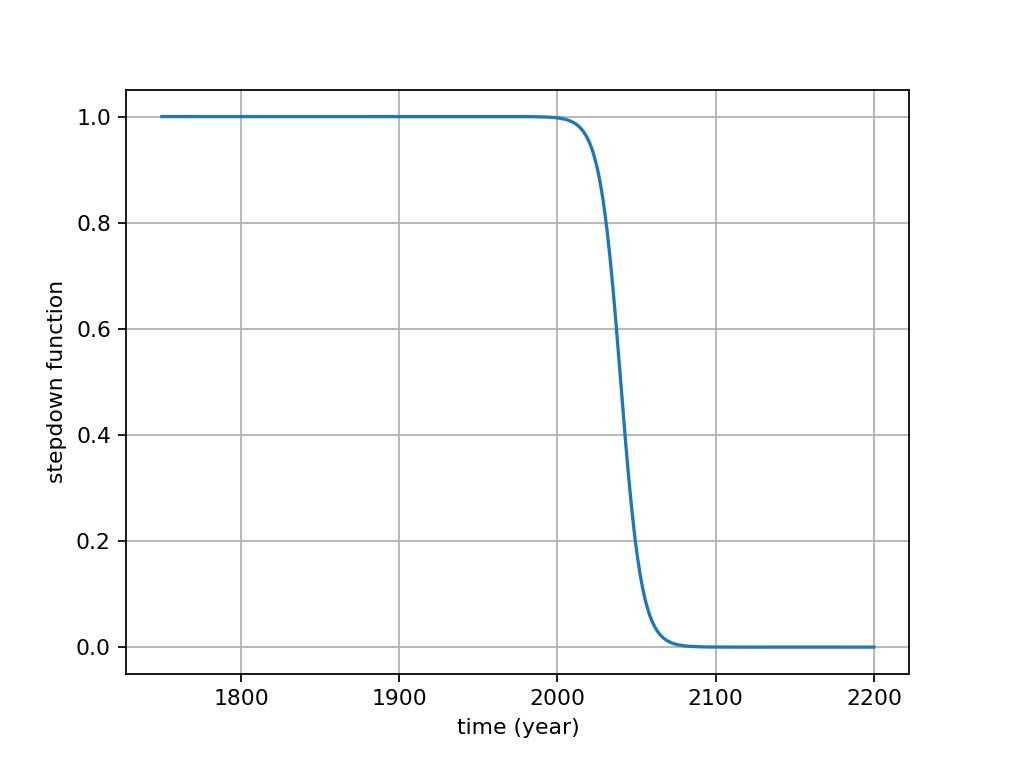

In [8]:
### BEGIN SOLUTION
mysigmadown = sigmadown(t,t_trans,delta_t_trans)
plt.figure()
plt.plot(t,mysigmadown)
plt.xlabel('time (year)')
plt.ylabel('stepdown function')
plt.grid()
### END SOLUTION

### Pause for analysis
This is about the 80/20 rule: In what year is the transition 20% under way? 80%? How many years separate these two? (It should be about the value of $\Delta t_{trans}$). The zoom function (a box in the set of cells right below the figure) will be helpful here.

### BEGIN SOLUTION



### END SOLUTION

### Calculating an emission scenario that peaks at desired year
Our next task is to compute an emission scenario as described in Eq. 1. This is pretty straightforward, but we're going to add a little wrinkle: we'll compute the parameter $t_{trans}$ from another parameter that's a bit more intuitive, namely, the year we want $\epsilon(t)$ to *peak*, using Eq. 4.

<IPython.core.display.Javascript object>


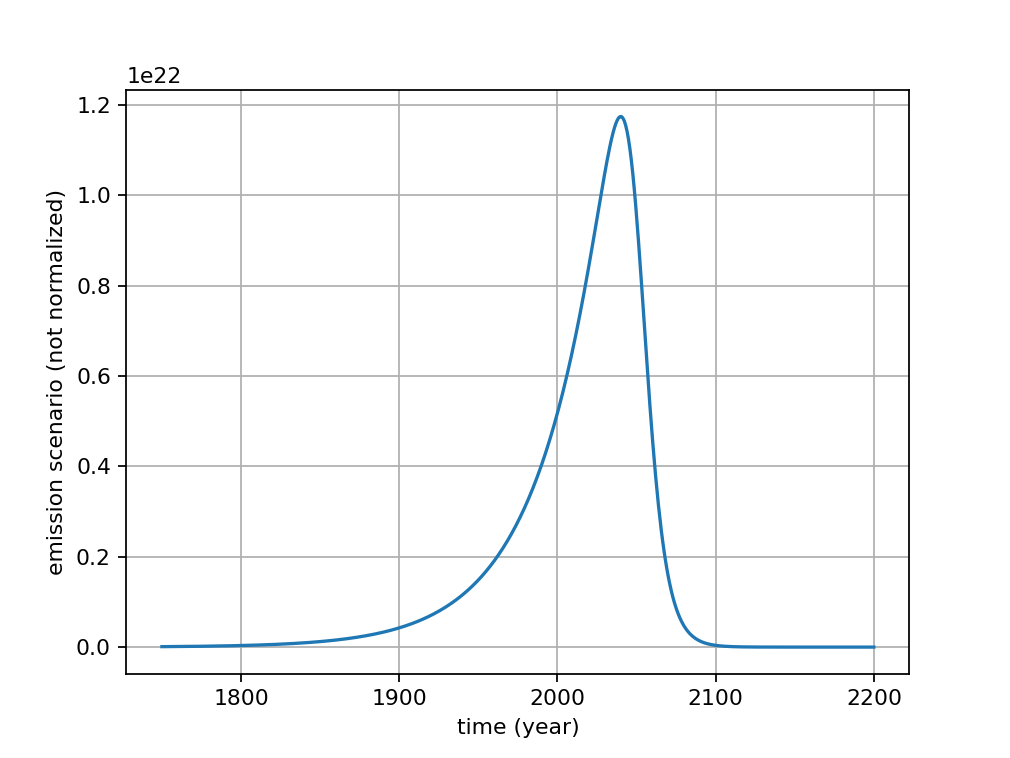

In [9]:
t_peak = 2040
t_trans = t_peak + delta_t_trans/3*np.log(3/(k*delta_t_trans)-1)
mysigmadown = sigmadown(t,t_trans,delta_t_trans)
myeps = mysigmadown*np.exp(k*t)

plt.figure()
plt.plot(t,myeps)
plt.xlabel('time (year)')
plt.ylabel('emission scenario (not normalized)')
plt.grid()

### Pause for analysis
You should just verify that the emissions really did peak in the desired year.

### Next: Getting $\epsilon (t)$
Now we're ready to calculate the normalized version of $\epsilon(t)$, as defined in Eqs 5 and 6. We do so in the cell below (calling the variable "myeps"), and then graph myeps as a function of time.

<IPython.core.display.Javascript object>


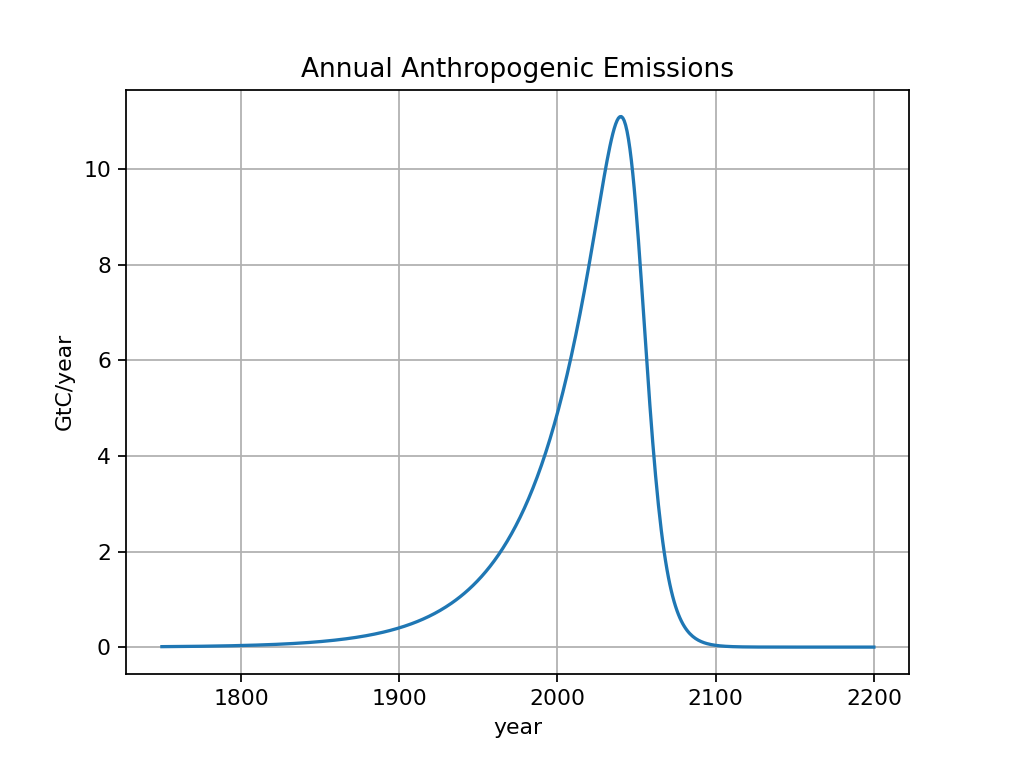

Text(0, 0.5, 'GtC/year')

In [10]:
eps_0 = 8
t_0 = 2020
myN = eps_0/(np.exp(k*t_0)*sigmadown(t_0,t_trans,delta_t_trans))
myeps = myN*mysigmadown*myexp

# Graph as a function of time
plt.figure()
plt.plot(t,myeps)
plt.grid(True)
plt.title('Annual Anthropogenic Emissions')
plt.xlabel('year')
plt.ylabel('GtC/year')
### END SOLUTION

### Pause for analysis
You should verify that in the year 2000, the rate of emission really is 8 GtC/year.

### Your turn
In the cell below, create an emissions scenario with the following parameters:

- a timeline running from the year 1750 to the year 2150, with 600 steps;
- a growth rate of 2.5%/year;
- emissions pegged at 12.9 GtC/year in the year 2020, peaking in the year 2040, with a transition interval ($\Delta t_{trans}$) of 15 years.

It will be convenient for what follows if you name your emissions scenario array "myeps."

<IPython.core.display.Javascript object>


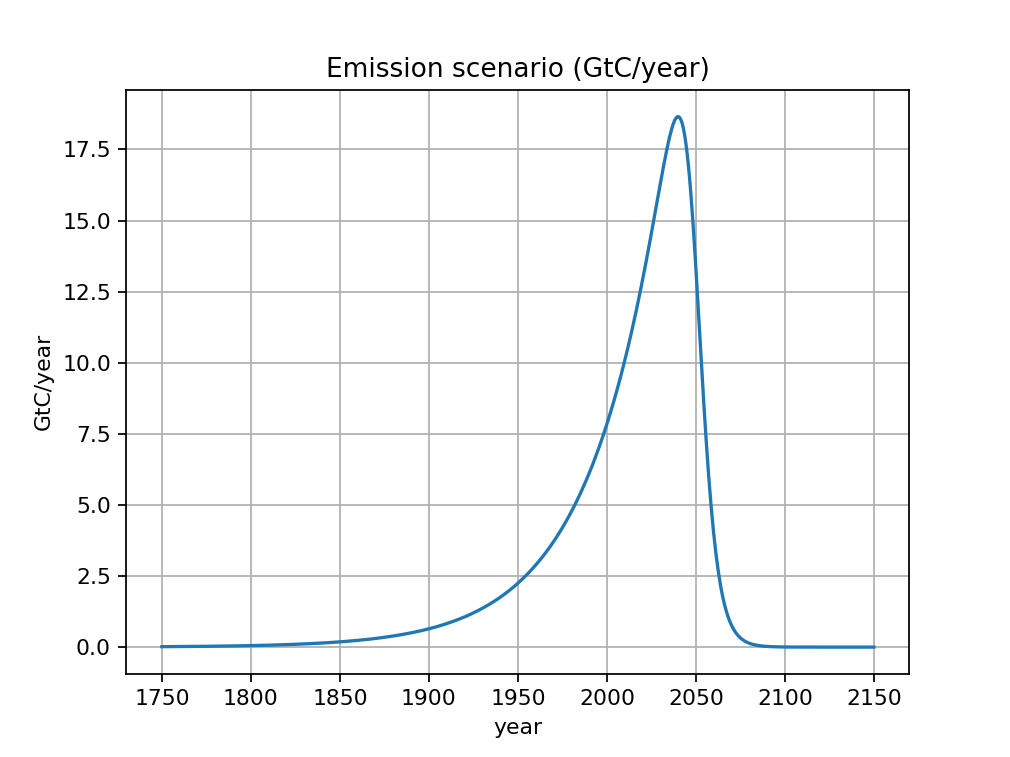

Text(0, 0.5, 'GtC/year')

In [11]:
### BEGIN SOLUTION
eps_0 = 12.9
t_0 = 2020
k = 0.025
t_start = 1750
t_stop = 2150
nsteps = 600
t = np.linspace(t_start,t_stop,nsteps)
t_peak = 2040

# This is just to generate another dataset
another_one = False
if another_one:
    t_peak = 2030

# Carrying on
k = 0.025
delta_t_trans = 15
t_trans = t_peak + delta_t_trans/3*np.log(3/(k*delta_t_trans)-1)
mysigmadown = sigmadown(t,t_trans,delta_t_trans)
myexp = np.exp(k*t)
myN = eps_0/(np.exp(k*t_0)*sigmadown(t_0,t_trans,delta_t_trans))
myeps = myN*mysigmadown*myexp

plt.figure()
plt.plot(t,myeps)
plt.grid(True)
plt.title('Emission scenario (GtC/year)')
plt.xlabel('year')
plt.ylabel('GtC/year')
### END SOLUTION

### Pause for analysis
You should verify that your scenario has all the properties it should have.

### Setting up your data with metadata for storage
The code below packages your results into a _Pandas_ dataframe. Why? Well, we want to save the data for use later, and _Pandas_ is a kind of industry standard. It's not quite enough, however, to store data: we really need to attach _metadata_ to these data. Metadata include things like the units of our data, and also parameters like the growth rate, the transition year, etc.

As you can see from the example below, we do this by creating a bigger structure -- a _dictionary_. A dictionary has the capability of holding lots of different pieces -- called _elements_ -- of various sizes and shapes. In the example below, the dictionary starts out empty, then we add an element (the _Pandas_ dataframe, of course). Later we'll be adding more elements to this dictionary, using the same procedure.

In [12]:
# Create an empty dictionary
epsdictionary = dict()

# Create an empty dataframe
epsdf = pd.DataFrame()

# Insert the time and emissions columns into the dataframe
epsdf.insert(loc=0, column='time', value=t)
epsdf.insert(loc=1, column='emissions', value=myeps)

# Add the dataframe to the dictionary
epsdictionary['dataframe']=epsdf

# Report the contents of the dictionary
display(epsdictionary)

{'dataframe':             time     emissions
 0    1750.000000  1.514387e-02
 1    1750.667780  1.539881e-02
 2    1751.335559  1.565804e-02
 3    1752.003339  1.592164e-02
 4    1752.671119  1.618967e-02
 ..           ...           ...
 595  2147.328881  1.039466e-06
 596  2147.996661  9.248215e-07
 597  2148.664441  8.228215e-07
 598  2149.332220  7.320713e-07
 599  2150.000000  6.513300e-07
 
 [600 rows x 2 columns]}

### Adding in metadata as elements of our dictionary
The first two lines of the cell below add two elements of metadata to our dictionary.

In [13]:
# This adds two elements to the dictionary
epsdictionary['emission units']='GtC/year'
epsdictionary['k']=k

# This displays the contents of the dictionary
display(epsdictionary)

{'dataframe':             time     emissions
 0    1750.000000  1.514387e-02
 1    1750.667780  1.539881e-02
 2    1751.335559  1.565804e-02
 3    1752.003339  1.592164e-02
 4    1752.671119  1.618967e-02
 ..           ...           ...
 595  2147.328881  1.039466e-06
 596  2147.996661  9.248215e-07
 597  2148.664441  8.228215e-07
 598  2149.332220  7.320713e-07
 599  2150.000000  6.513300e-07
 
 [600 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.025}

### Your turn
Add the following elements of metadata to your dictionary:
1. the pegged year;
1. the emissions at that pegged year;
1. the year of peak emissions;
1. the transition time; and
1. the transition time interval.

Then use "display" to confirm they were added properly.

In [14]:
# Add the additional elements mentioned above to your dictionary
### BEGIN SOLUTION
epsdictionary['t_0'] = t_0
epsdictionary['eps_0'] = eps_0
epsdictionary['t_trans'] = t_trans
epsdictionary['t_peak'] = t_peak
epsdictionary['delta_t_trans'] = delta_t_trans
display(epsdictionary)
### END SOLUTION

{'dataframe':             time     emissions
 0    1750.000000  1.514387e-02
 1    1750.667780  1.539881e-02
 2    1751.335559  1.565804e-02
 3    1752.003339  1.592164e-02
 4    1752.671119  1.618967e-02
 ..           ...           ...
 595  2147.328881  1.039466e-06
 596  2147.996661  9.248215e-07
 597  2148.664441  8.228215e-07
 598  2149.332220  7.320713e-07
 599  2150.000000  6.513300e-07
 
 [600 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.025,
 't_0': 2020,
 'eps_0': 12.9,
 't_trans': 2049.7295507452764,
 't_peak': 2040,
 'delta_t_trans': 15}

### Saving your emissions scenario
Use the cell below to save your emissions scenario (the entire dictionary -- data and metadata) as a file. Here's some sample code -- although you might want to modify the filename to something more meaningful, especially since we'll be eventually saving multiple scenarios.

    # Decide on a name for the file, and then save to that file
    filename = ''Peaks_in_2040.hdf5''
    h5io.write_hdf5(filename, epsdictionary, overwrite=True)

In [15]:
# Assign a name for the file, and save it
### BEGIN SOLUTION
filename = 'Peaks_in_2040.hdf5'

if another_one:
    filename = 'Peaks_in_2030.hdf5'
    
h5io.write_hdf5(filename, epsdictionary, overwrite=True)

# Checking it's there
%ls -al
### END SOLUTION

total 1836
drwxr-xr-x  3 instructor instructor   4096 Dec  2 21:47 ./
drwxr-xr-x 20 instructor instructor   4096 Dec  1 08:30 ../
drwxr-xr-x  2 instructor instructor   4096 Dec  2 21:06 .ipynb_checkpoints/
-rw-r--r--  1 instructor instructor  39384 Dec  2 21:47 Peaks_in_2040.hdf5
-rw-r--r--  1 instructor instructor 743172 Aug 22  2022 .Scenario1.hdf5
-rw-r--r--  1 instructor instructor  47172 Aug 22  2022 .Scenario2.hdf5
-rw-r--r--  1 instructor instructor  47172 Aug 22  2022 .Scenario3.hdf5
-rw-r--r--  1 instructor instructor 979242 Dec  2 21:07 ScheduledFlows.ipynb


### Double-checking
It's often nice to double-check that you really did save what you thought you did. The cell below will load the file you just saved and print out some information about it.

In [16]:
# This shows what I thought I saved
print('What I thought I saved:')
display(epsdictionary)
      
# This loads the stored dictionary
epsdictionary_fromfile = h5io.read_hdf5(filename)

# This shows what's in it
print('What I retrieved:')
display(epsdictionary_fromfile)

What I thought I saved:


{'dataframe':             time     emissions
 0    1750.000000  1.514387e-02
 1    1750.667780  1.539881e-02
 2    1751.335559  1.565804e-02
 3    1752.003339  1.592164e-02
 4    1752.671119  1.618967e-02
 ..           ...           ...
 595  2147.328881  1.039466e-06
 596  2147.996661  9.248215e-07
 597  2148.664441  8.228215e-07
 598  2149.332220  7.320713e-07
 599  2150.000000  6.513300e-07
 
 [600 rows x 2 columns],
 'emission units': 'GtC/year',
 'k': 0.025,
 't_0': 2020,
 'eps_0': 12.9,
 't_trans': 2049.7295507452764,
 't_peak': 2040,
 'delta_t_trans': 15}

What I retrieved:


{'dataframe':             time     emissions
 0    1750.000000  1.514387e-02
 1    1750.667780  1.539881e-02
 2    1751.335559  1.565804e-02
 3    1752.003339  1.592164e-02
 4    1752.671119  1.618967e-02
 ..           ...           ...
 595  2147.328881  1.039466e-06
 596  2147.996661  9.248215e-07
 597  2148.664441  8.228215e-07
 598  2149.332220  7.320713e-07
 599  2150.000000  6.513300e-07
 
 [600 rows x 2 columns],
 'delta_t_trans': 15,
 'emission units': 'GtC/year',
 'eps_0': 12.9,
 'k': 0.025,
 't_0': 2020,
 't_peak': 2040,
 't_trans': 2049.7295507452764}

### Refresh/save/validate
Almost done! To double-check everything is OK, repeat the "Three steps for refreshing and saving your code," and press the "Validate" button (as usual).

### Close/submit/logout
1. Close this notebook using the "File/Close and Halt" dropdown menu
1. Using the Assignments tab, submit this notebook
1. Press the Logout tab of the Home Page